In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df = pd.read_csv('./datasets/historical_data.csv')

In [27]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
print("Shape of the dataframe before cleaning:", count_row, count_col)

Shape of the dataframe before cleaning: 197428 16


Deal with NaN

In [28]:
# Number of missing values in the data
df.isnull().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [29]:
df_nan = df[df.isna().any(axis=1)]
df_nan

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,5477,NaN,1.0,3,5000,3,1500,1900,2.0,2.0,2.0,446,338.0
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,5477,NaN,1.0,2,3900,2,1200,2700,10.0,9.0,9.0,446,638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197212,1.0,2015-02-12 02:42:13,2015-02-12 03:39:29,2177,NaN,1.0,5,2800,5,300,700,28.0,28.0,21.0,446,800.0
197259,NaN,2015-02-10 01:32:37,2015-02-10 02:02:09,1340,NaN,NaN,1,849,1,849,849,25.0,13.0,20.0,251,1013.0
197363,1.0,2015-02-12 20:44:22,2015-02-12 21:30:44,2956,NaN,NaN,2,690,2,345,345,25.0,28.0,35.0,251,826.0
197416,1.0,2015-01-29 19:39:17,2015-01-29 20:34:21,2956,fast,4.0,1,639,1,639,639,26.0,26.0,37.0,251,NaN


In [30]:
df = df.dropna()
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [31]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns
print("Shape of the dataframe before cleaning:", count_row, count_col)

Shape of the dataframe before cleaning: 175777 16


Break down the df into smaller ones in order to manipulate the smaller dataframes accurately

* market_id: A city/region in which DoorDash operates, e.g., Los Angeles, given in the data as an id
* created_at: Timestamp in UTC when the order was submitted by the consumer to DoorDash. (Note this timestamp is in UTC, but in case you need it, the actual timezone of the region was US/Pacific)
* actual_delivery_time: Timestamp in UTC when the order was delivered to the consumer

In [32]:
df_time_features = df[['market_id', 'created_at', 'actual_delivery_time']]

In [33]:
df_time_features

,market_id,created_at,actual_delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24
...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22


* store_id: an id representing the restaurant the order was submitted for
* store_primary_category: cuisine category of the restaurant, e.g., italian, asian
* order_protocol: a store can receive orders from DoorDash through many modes. This field represents an id denoting the protocol


In [34]:
df_store_features = df[['store_id', 'store_primary_category', 'order_protocol']]

In [35]:
df_store_features

,store_id,store_primary_category,order_protocol
0,1845,american,1.0
1,5477,mexican,2.0
8,5477,indian,3.0
14,2841,italian,1.0
15,2841,italian,1.0
...,...,...,...
197423,2956,fast,4.0
197424,2956,fast,4.0
197425,2956,fast,4.0
197426,3630,sandwich,1.0


* total_items: total number of items in the order
* subtotal: total value of the order submitted (in cents)
* num_distinct_items: number of distinct items included in the order
* min_item_price: price of the item with the least cost in the order (in cents)
* max_item_price: price of the item with the highest cost in the order (in cents)

In [36]:
df_order_features = df[['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price']]

In [37]:
df_order_features

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price
0,4,3441,4,557,1239
1,1,1900,1,1400,1400
8,4,4771,3,820,1604
14,1,1525,1,1525,1525
15,2,3620,2,1425,2195
...,...,...,...,...,...
197423,3,1389,3,345,649
197424,6,3010,4,405,825
197425,5,1836,3,300,399
197426,1,1175,1,535,535


* total_onshift_dashers: Number of available dashers who are within 10 miles of the store at the time of order creation
* total_busy_dashers: Subset of above total_onshift_dashers who are currently working on an order
* total_outstanding_orders: Number of orders within 10 miles of this order that are currently being processed.

In [38]:
df_market_features = df[['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders']]

In [39]:
df_market_features

,total_onshift_dashers,total_busy_dashers,total_outstanding_orders
0,33.0,14.0,21.0
1,1.0,2.0,2.0
8,8.0,6.0,18.0
14,5.0,6.0,8.0
15,5.0,5.0,7.0
...,...,...,...
197423,17.0,17.0,23.0
197424,12.0,11.0,14.0
197425,39.0,41.0,40.0
197426,7.0,7.0,12.0


* estimated_order_place_duration: Estimated time for the restaurant to receive the order from DoorDash (in seconds)
* estimated_store_to_consumer_driving_duration: Estimated travel time between store and consumer (in seconds)

In [40]:
df_predictions_features = df[['estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']]

In [41]:
df_predictions_features

,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,446,861.0
1,446,690.0
8,446,289.0
14,446,795.0
15,446,205.0
...,...,...
197423,251,331.0
197424,251,915.0
197425,251,795.0
197426,446,384.0


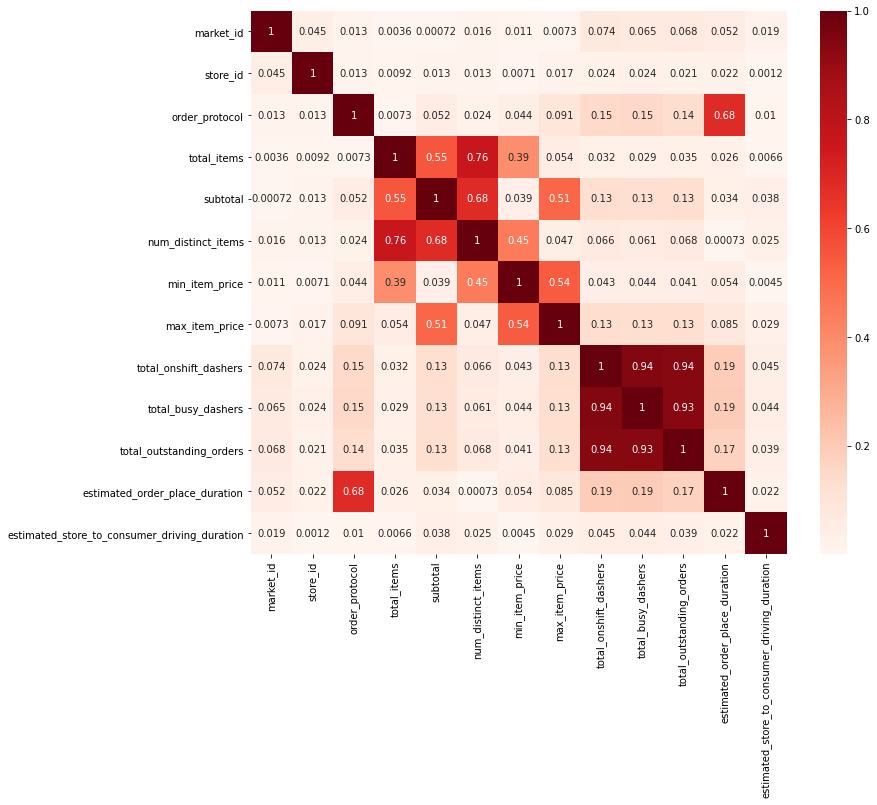

In [42]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr().abs()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [43]:
upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
print(upper_tri)

                                              market_id  store_id  \
market_id                                           NaN  0.044918   
store_id                                            NaN       NaN   
order_protocol                                      NaN       NaN   
total_items                                         NaN       NaN   
subtotal                                            NaN       NaN   
num_distinct_items                                  NaN       NaN   
min_item_price                                      NaN       NaN   
max_item_price                                      NaN       NaN   
total_onshift_dashers                               NaN       NaN   
total_busy_dashers                                  NaN       NaN   
total_outstanding_orders                            NaN       NaN   
estimated_order_place_duration                      NaN       NaN   
estimated_store_to_consumer_driving_duration        NaN       NaN   

                                 

<ipython-input-43-3e98ca48b41e>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))


In [44]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)


[]


## Preprocessing methods - Pipeline

#### Simple Imputer 

Univariate imputer for completing missing values with simple strategies.

Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.

## Machine Learning

### Linear Regression 

### SVM

### MLP 

### AdaBoost

### Random Forest 

## Deep Learning 